# Seaborn Basics


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

The goal of this exercise is to analyze a restaurant invoices and tips

In [16]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 1. Counting number of datapoints
---

❓ **On which day of the week are there more reservations at the restaurant?**
- Show this with a Seaborn "Countplot"
- Arrange days in week order
- Don't use rainbow colors

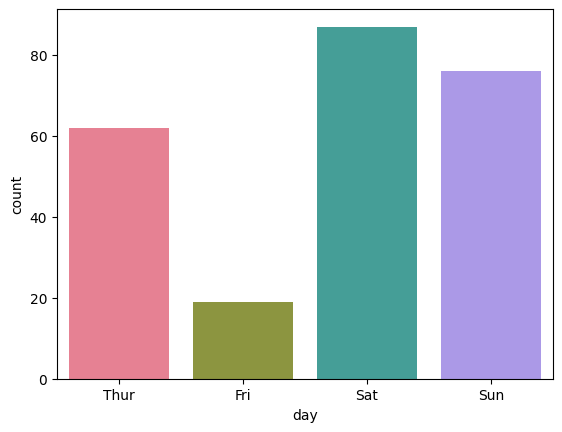

In [11]:
sns.countplot(x="day", data=df , palette="husl");

❓ Add a second breakdown with (`sex`, `smoker` or `time`) on top of the `day` dimension in a visually meaningful manner

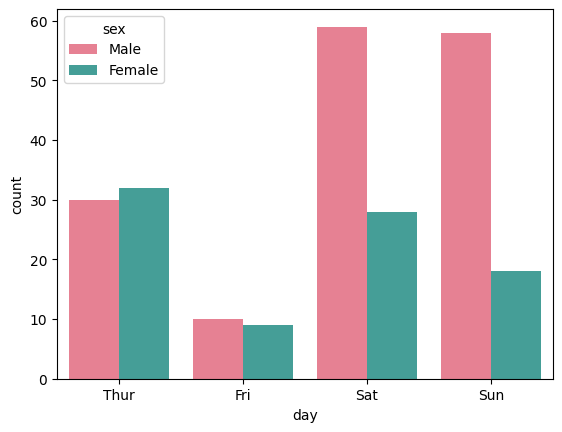

In [17]:
sns.countplot(x="day", data=df , hue = "sex", palette="husl");

## 2. Plotting distributions of numeric values

Let's now analyse the `tips` values.

### 2.1 Simple distribution

❓ Plot a histogram with seaborn and try out different number of `bins`. Try to overlay the powerful kernel density estimator `kde` on top of the histogram

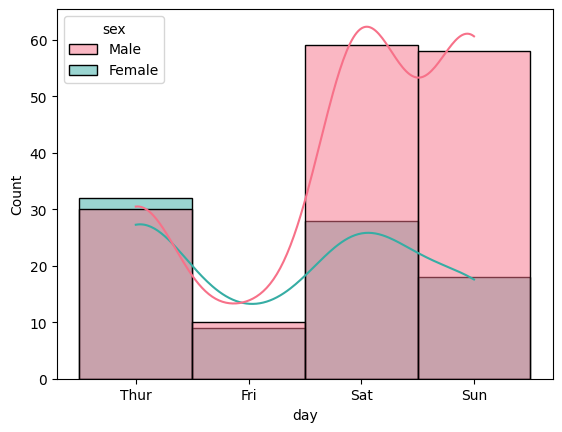

In [18]:
sns.histplot(x="day", data=df , hue = "sex", palette="husl", bins = 100, kde = True);

### 2.1 Multiples distribution, same ax

❓ Try to reproduce the graph below, and make sure to understand the different `kinds` of catplots (`"bar"`, `"box"`, `"violin"`, `"boxen"`)

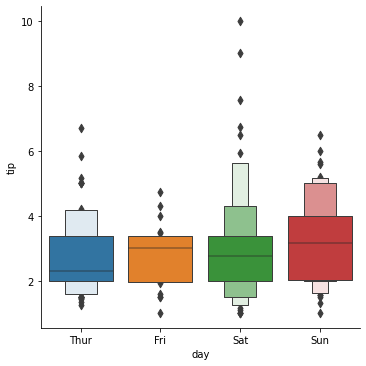

/Users/gulecs/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/categorical.py:3021: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxenplot
  warnings.warn(msg, UserWarning)


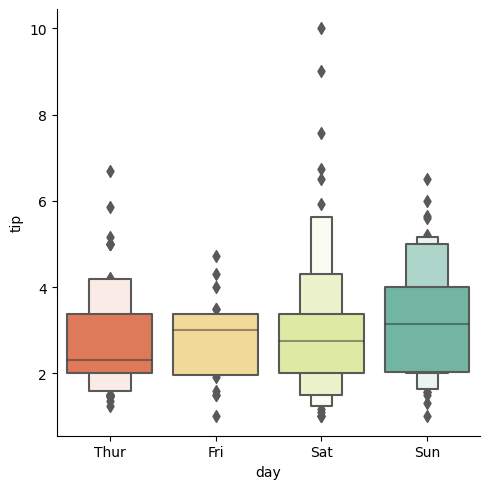

In [53]:
sns.catplot(x='day', y='tip', data=df, kind="boxen", palette = "Spectral", ax=axes);

### 2.2 FacetGrid of distributions

❓ Let's look into the powerful [`seaborn.FacetGrid`](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html)

1. Run the cell below. What do you observe?
2. Change `plt.hist` inside `g.map` to another plotting function (like `sns.histplot` with `kde=True`, or even a bi-variate function like `sns.scatterplot`). Make sure to understand how this works!

/Users/gulecs/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/gulecs/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/gulecs/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/gulecs/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in

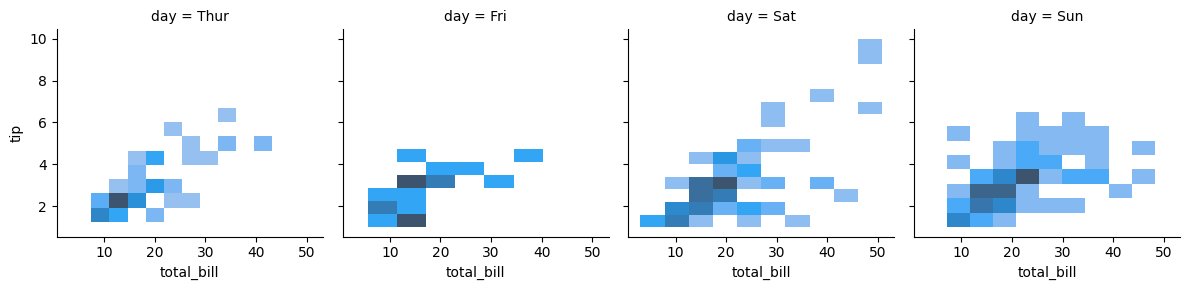

In [57]:
g = sns.FacetGrid(df, col="day")
g.map(sns.histplot, 'total_bill', 'tip', kde = True);

❓ Let's add a `row="smoker"` and `hue="smoker"` parameter. 

/Users/gulecs/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/gulecs/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/axisgrid.py:236: UserWarning: Legend does not support handles for QuadMesh instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  handles, labels = ax.get_legend_handles_labels()
/Users/gulecs/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/gulecs/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/axisgrid.py:236: UserWarning: Legend does not support handles fo

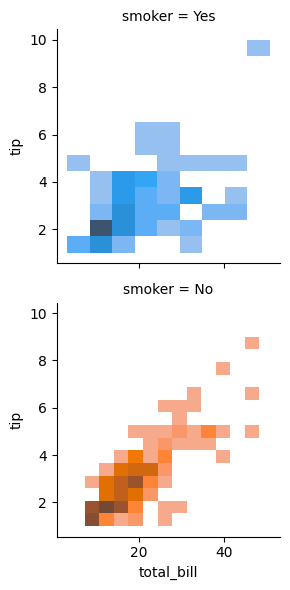

In [68]:
g = sns.FacetGrid(df, row="smoker", hue= "smoker")
g.map(sns.histplot, 'total_bill', 'tip', kde = True);

## Correlations

Let's start looking for correlation between  `tip` and `total_bill`


❓ First, *regress `tip`on `total_bill`* (scatterplot of `tips` on y-axis versus `total_bill` on x)

<AxesSubplot: xlabel='total_bill', ylabel='tip'>

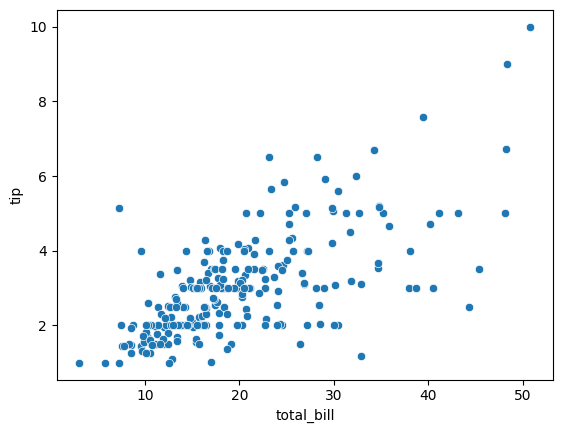

In [74]:
sns.scatterplot(data = df, x ="total_bill", y="tip")

❓ Another beautiful way of looking at this data is to use the [`seaborn.jointplot`](https://seaborn.pydata.org/generated/seaborn.jointplot.html)

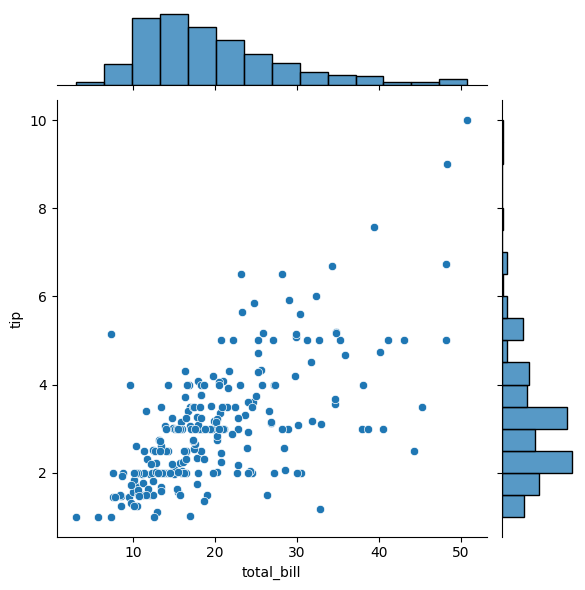

In [77]:
sns.jointplot(data=df, x ="total_bill", y="tip")

❓ Let's now compute a simple linear regression curve using `sns.regplot()`

<AxesSubplot: xlabel='total_bill', ylabel='tip'>

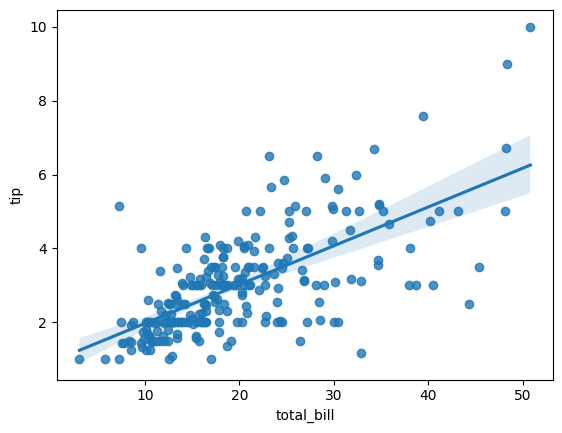

In [79]:
sns.regplot(data=df,x ="total_bill", y="tip")

❓Now, try also to use a `FacetGrid` to plot two regplots (one for smokers only, one for non-smokers). What conclusion can you draw?

/Users/gulecs/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/gulecs/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


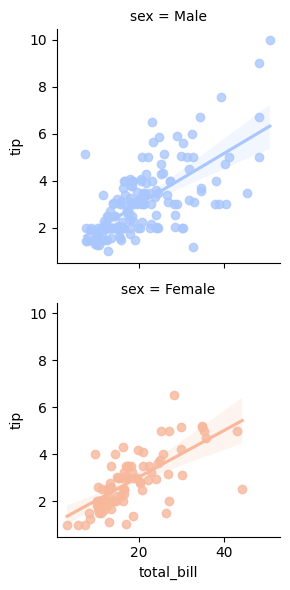

In [94]:
# Create a grid
g = sns.FacetGrid(df, row="sex", hue="sex", palette = "coolwarm") 

# Plot a graph in each grid element
g.map(sns.regplot, "total_bill", "tip");

## DataFrame-wide analysis with pairplot

❓ A very useful tool to identify **all correlations between all pairs of dataframe's columns** is the [`seaborn.pairplot`](https://seaborn.pydata.org/generated/seaborn.pairplot.html):

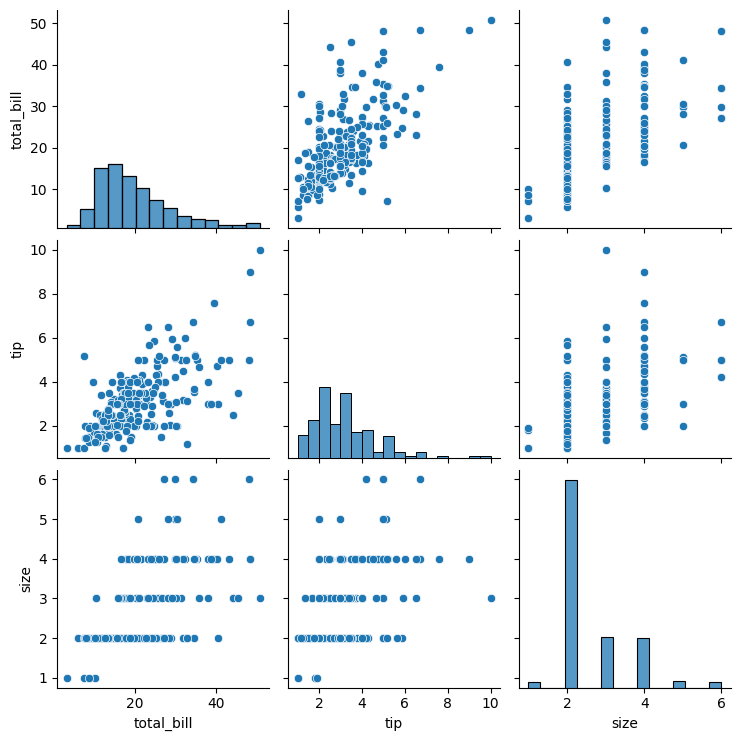

In [95]:
sns.pairplot(df)